<a href="https://colab.research.google.com/github/yincodeman/yincodeman/blob/main/AAPL_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://www.youtube.com/watch?v=QIUxPv5PJOY

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Terms Memory(LSTM)
#        To predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
#df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
df=pd.read_csv('AAPL.csv')
#Show teh data
df 

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(1258, 15)

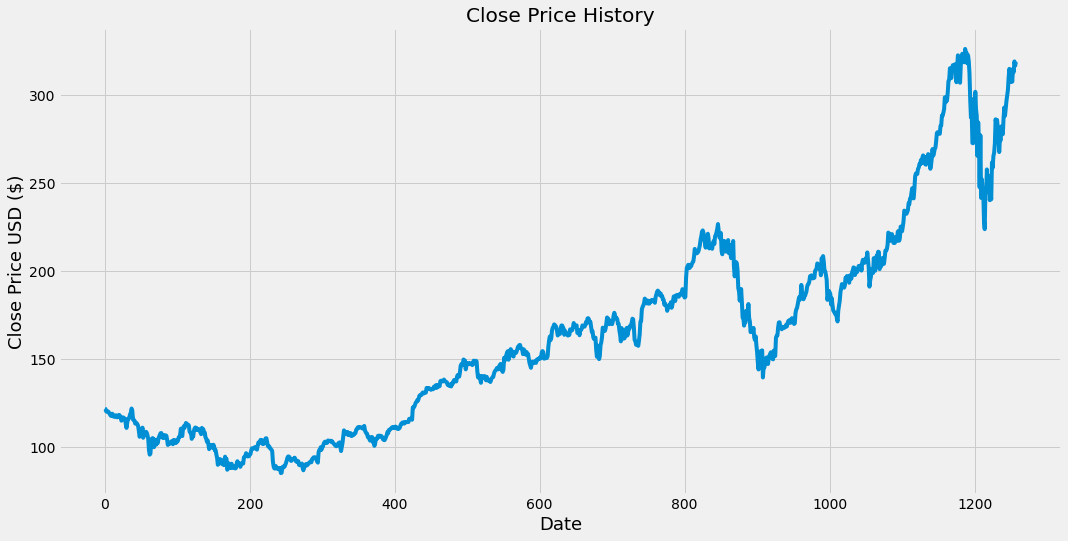

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['adjClose'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column
data = df.filter(['adjClose'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*.8 )

training_data_len

1007

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15215752],
       [0.15114583],
       [0.1454193 ],
       ...,
       [0.97055653],
       [0.96069667],
       [0.96914798]])

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.15215752, 0.15114583, 0.1454193 , 0.14639281, 0.14419764,
       0.14480847, 0.14190703, 0.13919648, 0.13595144, 0.13450072,
       0.14007454, 0.13896742, 0.1335463 , 0.13259188, 0.13518791,
       0.1340426 , 0.13625686, 0.13137022, 0.13522608, 0.13301183,
       0.13713493, 0.13480614, 0.13194288, 0.12346762, 0.12688444,
       0.13137022, 0.13075939, 0.12907961, 0.12789613, 0.11598495,
       0.10644074, 0.11869551, 0.1277816 , 0.12759072, 0.13221011,
       0.138662  , 0.14289963, 0.15225296, 0.14721361, 0.12610182,
       0.12587276, 0.12335309, 0.11674849, 0.11907728, 0.11758838,
       0.11522142, 0.11113649, 0.10021792, 0.08571071, 0.08861215,
       0.08956658, 0.0910622 , 0.10716889, 0.08327729, 0.08998842,
       0.08964327, 0.09274957, 0.09735148, 0.09482043, 0.08910638])]
[0.08005595508786323]

[array([0.15215752, 0.15114583, 0.1454193 , 0.14639281, 0.14419764,
       0.14480847, 0.14190703, 0.13919648, 0.13595144, 0.13450072,
       0.14007454, 0.13896742, 0.13

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(947, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train , batch_size =1, epochs =1)

947/947 [==============================] - 8s 6ms/step - loss: 0.0013


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 947 to 1007
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test =dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

18.600570766431748

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


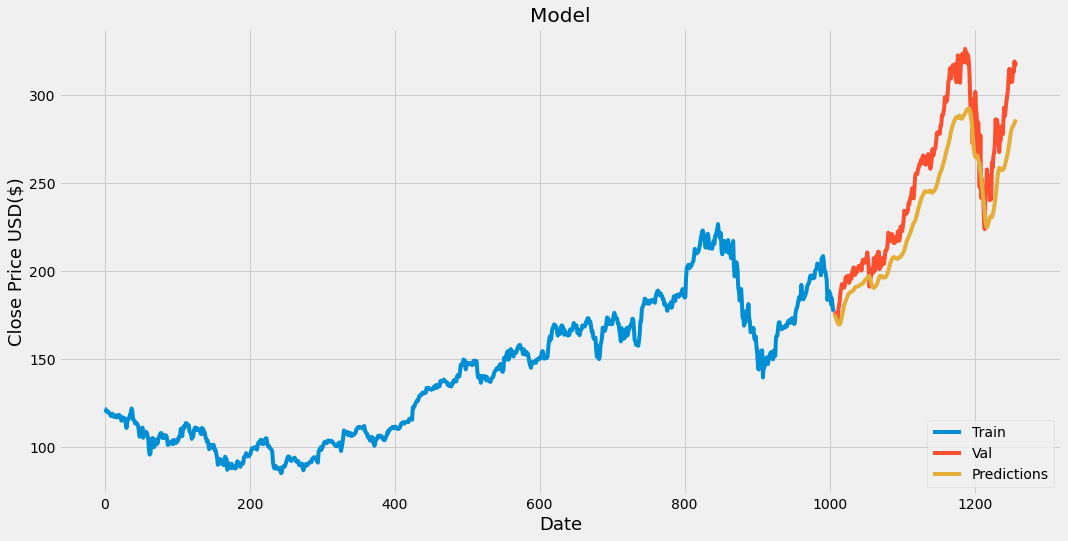

In [ ]:
#Plot the data
train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions'] =predictions
#Visualize the data
plt.figure(figsize =(16,8))
plt.title("Model")
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)',fontsize =18)
plt.plot(train['adjClose'])
plt.plot(valid[['adjClose','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,adjClose,Predictions
1007,176.133774,175.449188
1008,175.293771,174.089920
1009,176.202951,172.846710
1010,173.010940,171.884567
1011,171.261758,170.883743
...,...,...
1253,314.960000,282.345886
1254,313.140000,283.287170
1255,319.230000,284.053497
1256,316.850000,285.234222


In [ ]:
#Get the quote 
#apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
apple_quote = pd.read_csv('AAPL.csv')
#Create a new dataframe
new_df = apple_quote.filter(['adjClose'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days =new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append teh past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[287.22086]]


In [ ]:
#Get the quote 
apple_quote2 = pd.read_csv('AAPL.csv')
print(apple_quote2['adjClose'])

0       121.682558
1       121.438354
2       120.056069
3       120.291057
4       119.761181
           ...    
1253    314.960000
1254    313.140000
1255    319.230000
1256    316.850000
1257    318.890000
Name: adjClose, Length: 1258, dtype: float64
